<h1><code style="background:black;color:white">              Chronic Kidney Disease(CKD) Prediction                 </code></h1>

## Introduction

<div style="text-align: justify"> Chronic kidney disease, often known as chronic kidney failure, is defined by a steady decline in kidney function. The new analysis suggests that in 2017, the global prevalence of CKD was 9.1% (697.5 million cases). <br>
We can determine if a patient has chronic kidney disease or not by using machine learning techniques to the data gathered from their blood samples. The early diagnosis of the illness allows the doctor to provide the patient the necessary medications to prevent renal failure. </div>

### Authored by: Team UPMOST

#### Team Members :
- Sai Srihitha Goverdhana
- Bhanu Prakash Konda
- Rama Sai Reddy Chinthamreddy
- Sowmya Komirelli
- Ravi Teja Gorantla
- Vivek Reddy Gurrala

### Description of the Analysis

1. The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc).    The target is the ‘classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. 

2. Using machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not.

3. In our project, we will be comparing few machine learning models and will apply k-folds to bring out the best recall for our dataset.

4. Many ML models were previously used to predict different kidney diseases

5. Various machine learning methods have been explored- including K-nearest neighbors (KNN) classifier, Random Forest classifier and decision tree classifiers,logistic regression,  Neural Networks etc. For improving these learning techniques, various cross-validation methods have been performed below.

6. The important performance metric here is 'recall'

### Preliminary (Business) Problem Scoping

1. To determine whether a certain person in the dataset requires a diagnosis of chronic kidney disease or not, we are creating a binary classifier. Classification (CKD) 1 (Needs to be treated) will thus be our positive case, while Classification (NotCKD) 0 (Does not need to be treated) will be our negative case.

2. We will test many models to see if we can create one with adequate predictive power to reliably anticipate the future.

## 1. Importing the required packages

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve

%matplotlib inline

## 2. Load, Clean and Prepare data

###   2.1    Loading the data from data source

In [11]:
# Loading the Data File

kidney = pd.read_csv('kidney_disease.csv')
kidney.head(6)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


> For better understanding of the Data, Here are names of attributes
- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - haemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia
- classification

### 2.2  Data Exploration

In [12]:
# Explore the dataset
print(kidney.columns)
print("--------------------------------------------------------------------------------")
print(kidney.describe())
print("---------------------------------------------------------------------------------")
print(kidney.info())

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
--------------------------------------------------------------------------------
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000   

### 2.3 Describe the Data

In [13]:
# Just Tranforming the Matrix, So that we can observe all the continuous columns(rows)
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


### 2.4 Performing Data Cleaning

>  Here in our dataset 'classification' is the target where '0' indicates Not Chronic Kidney Disease and '1' indicates CKD Chronic Kidney Disease


In [14]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will handle that

In [15]:
features=['pcv','wc','rc']
for i in features:
    convert_dtype(kidney,i)

In [16]:
# Print the Daya Types of all the Attributes Present in the Dataset
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [17]:
kidney.drop('id',inplace=True,axis=1)

> Differntiating Categorical observations and Numerical observations for better understanding and for easy, good analysis

In [18]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [19]:
cat_col,num_col=extract_cat_num(kidney)

> Printing categorical columns and Numerical columns

In [20]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [21]:
num_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

> There is some dirtiness in categorical Data, To fix that Lets do this - First print the values and manipulate

In [22]:
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


cad has ['no' 'yes' '\tno' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'ckd\t' 'notckd'] values




> From the above output we can see some '\t' are present in few categorical columns

> Lets Replace them Accordingly!!!!!!!!!!!!

In [23]:
kidney['dm'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['cad'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [24]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

rbc has [nan 'normal' 'abnormal'] values


pc has ['normal' 'abnormal' nan] values


pcc has ['notpresent' 'present' nan] values


ba has ['notpresent' 'present' nan] values


htn has ['yes' 'no' nan] values


dm has ['yes' 'no' ' yes' nan] values


cad has ['no' 'yes' nan] values


appet has ['good' 'poor' nan] values


pe has ['no' 'yes' nan] values


ane has ['no' 'yes' nan] values


classification has ['ckd' 'notckd'] values




### 2.5 Handling Missing Values

> Why Should We Care About Handling Missing Value?

> If the missing values are not handled properly, you risk creating a biased machine learning model that returns false results.

> Lack of precision in the statistical analysis can result from missing data.

In [25]:
kidney.isnull().sum().sort_values(ascending=False)

rbc               152
rc                131
wc                106
pot                88
sod                87
pcv                71
pc                 65
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
ba                  4
pcc                 4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [26]:
list(enumerate(cat_col))

[(0, 'rbc'),
 (1, 'pc'),
 (2, 'pcc'),
 (3, 'ba'),
 (4, 'htn'),
 (5, 'dm'),
 (6, 'cad'),
 (7, 'appet'),
 (8, 'pe'),
 (9, 'ane'),
 (10, 'classification')]

In [27]:
np.mean(kidney)

age       51.483376
bp        76.469072
sg         1.017408
al         1.016949
su         0.450142
bgr      148.036517
bu        57.425722
sc         3.072454
sod      137.528754
pot        4.627244
hemo      12.526437
pcv       38.884498
wc      8406.122449
rc         4.707435
dtype: float64

> Filling few num_col with median

In [28]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)
kidney.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

#### 2.5.1 Filling missing values in categorical columns using random values

In [29]:
kidney['rbc'].isnull().sum()

152

In [30]:
random_sample=kidney['rbc'].dropna().sample(152)
random_sample

11     abnormal
337      normal
363      normal
369      normal
181      normal
         ...   
33     abnormal
267      normal
347      normal
306      normal
103      normal
Name: rbc, Length: 152, dtype: object

In [31]:
kidney[kidney['rbc'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [32]:
random_sample.index

Int64Index([ 11, 337, 363, 369, 181,  40, 239, 128, 154, 384,
            ...
            150, 167, 246, 221, 376,  33, 267, 347, 306, 103],
           dtype='int64', length=152)

In [33]:
random_sample.index=kidney[kidney['rbc'].isnull()].index   

In [34]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [35]:
kidney.loc[kidney['rbc'].isnull(),'rbc']=random_sample
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [36]:
kidney['rbc'].isnull().sum()

0

In [37]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample
Random_value_Imputation('pc')

In [38]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               4
ba                4
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [39]:
def impute_mode(feature):
    mode=kidney[feature].mode()[0]
    kidney[feature]=kidney[feature].fillna(mode)

In [40]:
for col in cat_col:
    impute_mode(col)
kidney[cat_col].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

> Checking null values for all columns

In [41]:
kidney.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### 2.6 Performing the Feature Encoding

In [42]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

rbc has 2 categories
pc has 2 categories
pcc has 2 categories
ba has 2 categories
htn has 2 categories
dm has 3 categories
cad has 2 categories
appet has 2 categories
pe has 2 categories
ane has 2 categories
classification has 2 categories


In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


### 2.7 Correlation between the Target variable and all the independent variables
The below bargraph depicts the relation between all the individual independaent variables and target variable where direct bilirubin has much impact followed by total_bilirubin and total protiens has the least .

In [45]:
len(num_col)

14

In [46]:
kidney.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.000000,0.136316,-0.160374,0.085918,0.186750,-0.061634,-0.113214,0.157401,0.042427,0.230731,...,-0.212796,0.093794,-0.203199,0.395073,0.359467,0.231419,0.156581,0.094772,0.052938,-0.227842
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,-0.188020,-0.156574,0.056808,0.110164,0.150180,...,-0.289237,0.022177,-0.219317,0.266901,0.229902,0.084135,0.175054,0.056902,0.195134,-0.293693
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,0.244053,0.322412,-0.306426,-0.231704,-0.299413,...,0.496434,-0.195068,0.432222,-0.323643,-0.352804,-0.135814,-0.230975,-0.253803,-0.184155,0.659504
al,0.085918,0.123518,-0.479962,1.000000,0.287751,-0.321062,-0.481051,0.417868,0.377935,0.293150,...,-0.473446,0.202920,-0.405092,0.406057,0.312978,0.200957,0.303145,0.411080,0.229556,-0.531562
su,0.186750,0.189561,-0.292053,0.287751,1.000000,-0.072953,-0.181066,0.168091,0.119399,0.627002,...,-0.181285,0.156649,-0.161994,0.254268,0.431277,0.229301,0.069216,0.116442,0.042464,-0.294555
rbc,-0.061634,-0.188020,0.244053,-0.321062,-0.072953,1.000000,0.229181,-0.088840,-0.110987,-0.144874,...,0.244916,0.033611,0.181520,-0.184354,-0.202329,-0.131823,-0.092979,-0.195957,-0.070321,0.329151
pc,-0.113214,-0.156574,0.322412,-0.481051,-0.181066,0.229181,1.000000,-0.452299,-0.285070,-0.215699,...,0.409246,-0.105902,0.367392,-0.335028,-0.223030,-0.131643,-0.266936,-0.356163,-0.319431,0.398803
pcc,0.157401,0.056808,-0.306426,0.417868,0.168091,-0.088840,-0.452299,1.000000,0.275082,0.195223,...,-0.296580,0.163215,-0.263810,0.195623,0.167585,0.188029,0.189688,0.104356,0.175861,-0.265313
ba,0.042427,0.110164,-0.231704,0.377935,0.119399,-0.110987,-0.285070,0.275082,1.000000,0.079162,...,-0.189420,0.104748,-0.192212,0.089046,0.081995,0.162395,0.149126,0.134732,0.052208,-0.186871
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,-0.144874,-0.215699,0.195223,0.079162,1.000000,...,-0.258200,0.119881,-0.214094,0.367816,0.506741,0.207020,0.177285,0.094806,0.112449,-0.379321


<AxesSubplot:>

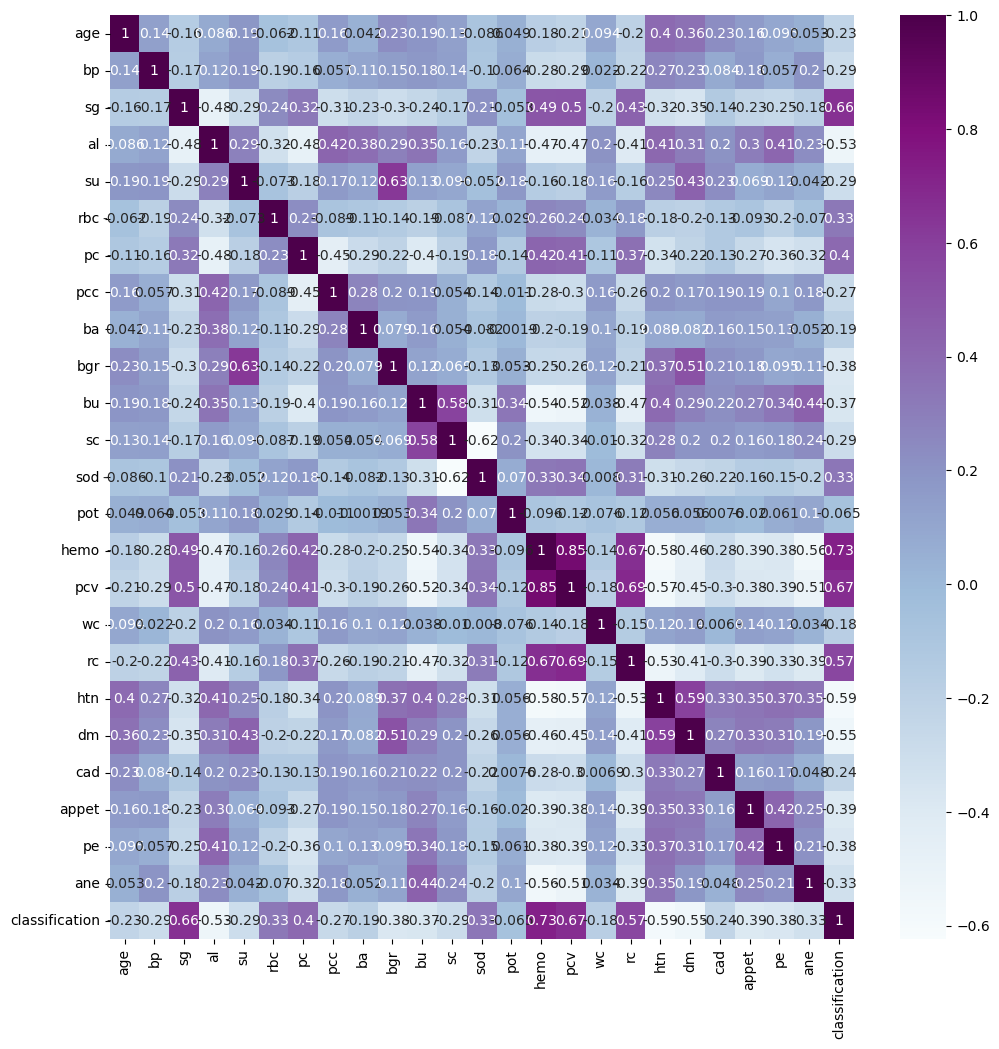

In [47]:
plt.figure(figsize = (12,12))
sns.heatmap(kidney.corr(method='pearson'), cbar=True, cmap='BuPu',annot=True)

> haemoglobin and albumin are negatively correlated

> Rbc count is positively correlated with specific gravity,haemoglobin,packed cell volume


> Packed cell volume and haemoglobin are highly positive correlated

> Rbc count is negatively correlated with albumin, blood urea

> Packed cell volume is negatively correlated with albumin and blood urea

In [48]:
def show_corr(dataset, target_name, n_most=None):
    if n_most is None:
        n_most=len(dataset.columns.values)-1
    corr_matrix=dataset.corr().abs()
    most_correlated_features=corr_matrix[target_name].sort_values(ascending=False).drop(target_name)
    most_correlated_feature_names=most_correlated_features.index.values
    
    fig, ax=plt.subplots(figsize=(15,5))
    plt.xticks(rotation="90")
    sns.barplot(x=most_correlated_feature_names, y=most_correlated_features)
    plt.title("{} correlation with the independent variables".format(target_name))

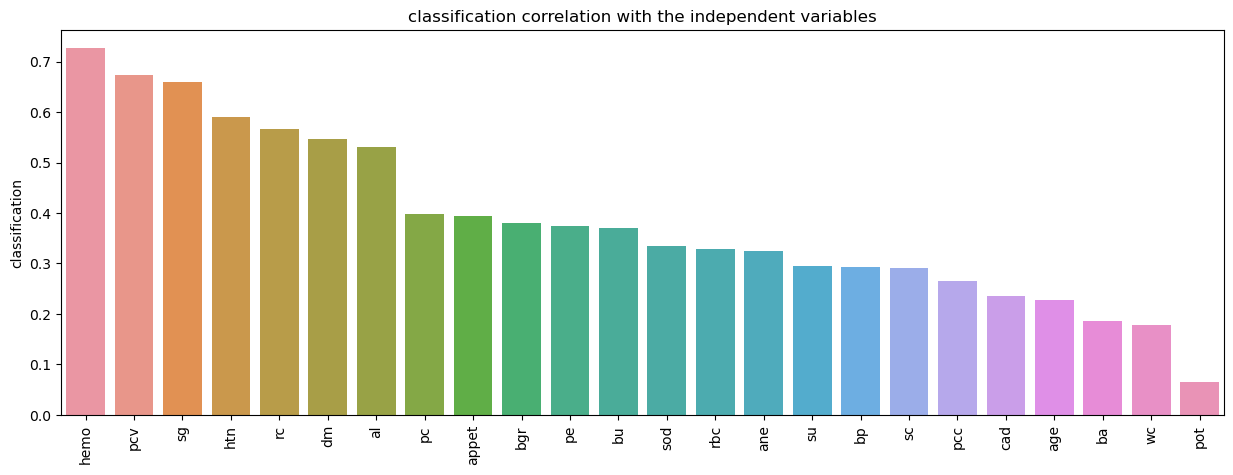

In [49]:
show_corr(dataset=kidney, target_name='classification')

<AxesSubplot:xlabel='classification', ylabel='count'>

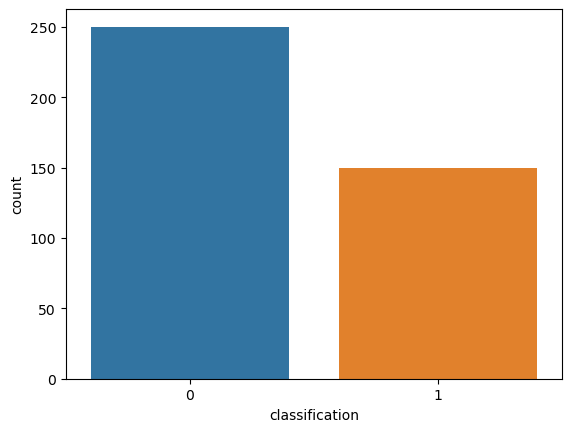

In [50]:
sns.countplot(kidney['classification'])

In [51]:
kidney.groupby(['rbc','classification'])['rbc'].agg(['count','mean','median','min','max'])

count  mean  median  min  max
rbc classification                               
0   0                  71   0.0     0.0    0    0
    1                   3   0.0     0.0    0    0
1   0                 179   1.0     1.0    1    1
    1                 147   1.0     1.0    1    1

white blood cell count', - wbc
'blood urea', - bu
'blood glucose random',
'serum creatinine',
'packed cell volume', 
'albumin', 
'haemoglobin',
       'age', 
       'sugar', 
       'hypertension'

### 2.8 Checking distribution of class

In [52]:
kidney['classification'].value_counts()

0    250
1    150
Name: classification, dtype: int64

In [53]:
selected = ['wc', 'bu', 'bgr',
       'sc', 'pcv', 'al', 'hemo',
       'age', 'su', 'htn']

In [54]:
X=kidney[selected]

In [55]:
X.head(5)

,wc,bu,bgr,sc,pcv,al,hemo,age,su,htn
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [56]:
y = kidney['classification'].copy()

In [57]:
X.head(3)

,wc,bu,bgr,sc,pcv,al,hemo,age,su,htn
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0


In [58]:
y.head(3)

0    0
1    0
2    0
Name: classification, dtype: int32

## 3.  Split data intro training and validation sets

#### Create the training set and the test set with a 80/20 split.

> With 80% of the data for training and 20% for testing, we've chosen to use a train-test split. 

> As our considered Dataset is a small Dataset, This percentage split ratio is inline with common practice for small to medium sized datasets.

> In real-time Problems Generally Data is split into 3 parts - Train, Test and Validate. But here, Given that we are just evaluating two models and want to devote as much data as possible to the training and validation processes, we have chosen not to perform a three-way data split.

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### 3.1 Balancing the Data

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

# split the data into validation and training set
train_df, validation_df = train_test_split(kidney, test_size=0.2, random_state=1)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'classification'
predictors = selected

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training and validation sets
train_predictors = scaler.transform(train_df[predictors]) # train_predictors is not a numpy array
train_target = train_df[target] # train_target is now a series object

validation_predictors = scaler.transform(validation_df[predictors]) # validation_target is now a series object
validation_target = validation_df[target] # validation_target is now a series object

In [61]:
# Class count
No_CKD, Yes_CKD = train_df.classification.value_counts()
# Divide by class
NO = train_df[train_df['classification'] == 0]
YES= train_df[train_df['classification'] == 1]

#Over-sampling
YES_OVER = YES.sample(No_CKD, replace=True)
df_test_over = pd.concat([NO, YES_OVER], axis=0)

print('Random over-sampling:')
print(df_test_over.classification.value_counts())

df_test_over.classification.value_counts()

Random over-sampling:
0    203
1    203
Name: classification, dtype: int64


0    203
1    203
Name: classification, dtype: int64

## 4. Training our Models with the default values

> We train each model using its default parameters, then calculate its performance metric - recall.

> Performance Metric - Why Recall ? 

> Here FN means - Predicting that a person is not at the Risk of CKD, but they are the risk of CKD. 

### 4.1 K-nn with Default Parameters

In [62]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
print("Classification Report")
print(classification_report(y_test, ypred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.62      0.70        47
           1       0.59      0.79      0.68        33

    accuracy                           0.69        80
   macro avg       0.70      0.70      0.69        80
weighted avg       0.72      0.69      0.69        80



In [70]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(confusion_matrix(y_test, ypred))
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, ypred): .3f}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, ypred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, ypred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, ypred):.3f}")

      Model             Score       
************************************
[[29 18]
 [ 7 26]]
************************************
>> Recall Score:   0.788
Accuracy Score:   0.688
Precision Score:  0.591
F1 Score:         0.675


### 4.2 DecisionTree with Default Parameters

In [71]:
dtree=DecisionTreeClassifier(random_state=1)
dtree_fit= dtree.fit(X_train, y_train)
dtpred = dtree.predict(X_test)
print("Classification Report")
print(classification_report(y_test, dtpred))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.94      0.94      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [72]:
print("************** DecisionTree Classifier **********************")
print("\n")
print(f"{'Model':^18}{'Score':^18}")
print("**************************************")
print(confusion_matrix(y_test, dtpred))
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, dtpred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, dtpred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, dtpred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, dtpred)}")

************** DecisionTree Classifier **********************


      Model             Score       
**************************************
[[45  2]
 [ 2 31]]
************************************
>> Recall Score:  0.9393939393939394
Accuracy Score:   0.95
Precision Score:  0.9393939393939394
F1 Score:         0.9393939393939394


### 4.3 Random Forest with Default Parameters

In [73]:
# random forest model creation
Randomforest = RandomForestClassifier()
Randomforest.fit(X_train,y_train)
# predictions
rfpred = Randomforest.predict(X_test)

print("===================== Classification Report ===================")
print(classification_report(y_test, rfpred))
print('\n')


===================== Classification Report ===================
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        47
           1       0.91      0.97      0.94        33

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80





In [74]:
# random forest model
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, rfpred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, rfpred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, rfpred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, rfpred)}")

      Model             Score       
************************************
>> Recall Score:  0.9696969696969697
Accuracy Score:   0.95
Precision Score:  0.9142857142857143
F1 Score:         0.9411764705882354


### 4.4 XGboost with Default Parameters

In [75]:
#Train the XGboost Model for Classification
XGboost = xgb.XGBClassifier()
train_XGBoost = XGboost.fit(X_train, y_train)

[16:16:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
xgpred = train_XGBoost.predict(X_test)
print("=========================== Classification Report ================================")
print(classification_report(y_test, xgpred))
print('\n')

=========================== Classification Report ================================
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.94      0.97      0.96        33

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80





In [78]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, xgpred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, xgpred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, xgpred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, xgpred)}")

      Model             Score       
************************************
>> Recall Score:  0.9696969696969697
Accuracy Score:   0.9625
Precision Score:  0.9411764705882353
F1 Score:         0.955223880597015


### 4.5 Adaboost with Default Parameters

In [65]:
# Create adaboost classifer object
Adaboost = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
Adaboost_fit=Adaboost.fit(X_train, y_train)

#Predict the response for test dataset
adapred = Adaboost_fit.predict(X_test)
print("=================================== Classification Report =================================")
print(classification_report(y_test, adapred))
print('\n')

=================================== Classification Report =================================
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.94      0.97      0.96        33

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80





In [66]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, adapred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, adapred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, adapred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, adapred)}")

      Model             Score       
************************************
>> Recall Score:  0.9696969696969697
Accuracy Score:   0.9625
Precision Score:  0.9411764705882353
F1 Score:         0.955223880597015


### 4.6 Logistic Regression

In [67]:
logReg = LogisticRegression()

In [68]:
logReg.fit(X_train,y_train)

LogisticRegression()

In [69]:
# X_train,y_trainlogClassifier=LogisticRegression(random_state=1) # Create the model
# _ = logClassifier.fit() # fit the model to training data. NOTE: underscore is a dummy variable that is useed to suppress output

In [70]:
pred = logReg.predict(X_test)

In [71]:
score = logReg.score(X_test, y_test)
print(score)

0.9


#### Confusion Matrix 

In [72]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[40  7]
 [ 1 32]]


In [73]:
import warnings #Just to ignore all the warnings
warnings.filterwarnings("ignore")

In [74]:
y_pred = logReg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")

[[40  7]
 [ 1 32]]
***********************
Recall Score:     0.970
***********************
Accuracy Score:   0.900
Precision Score:  0.821
F1 Score:         0.889


### 4.7 Training MLP
Multi-layer Perceptron classifier.This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

*  Hidden_layer_sizestuple, length = n_layers - 2, default=(100,)
The ith element represents the number of neurons in the ith hidden layer.

*  solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
The solver for weight optimization.
‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
‘sgd’ refers to stochastic gradient descent.
‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba.

*  verbosebool, default=False
Whether to print progress messages to stdout.
 
*  alphafloat, default=0.0001
Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

In [75]:
%%time
ann = MLPClassifier(hidden_layer_sizes=(36,18,9), solver='adam', max_iter=1200,random_state =1)
_ = ann.fit(X_train, y_train)

CPU times: total: 203 ms
Wall time: 82.1 ms


In [76]:
%%time
y_pred = ann.predict(X_test)

CPU times: total: 0 ns
Wall time: 2.62 ms


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        47
           1       0.73      1.00      0.85        33

    accuracy                           0.85        80
   macro avg       0.87      0.87      0.85        80
weighted avg       0.89      0.85      0.85        80



In [78]:
confusion_matrix(y_test, y_pred)

array([[35, 12],
       [ 0, 33]], dtype=int64)

In [79]:
y_pred = ann.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

[[35 12]
 [ 0 33]]
***********************
Accuracy Score:   0.850
***********************
Recall Score:     1.000
Precision Score:  0.733
F1 Score:         0.846
***********************


## 5. Hypertuning the Models 

### 5.1 Training a pruned Decision Tree using GridsearchCv: 
Determine the parameters that can be "tuned"

You can review the parameters of the model which you're trying to "tune". In this case, we're using a DecisionTreeClassifier. Begin by reviewing the parameters for this model found here fter reviewing these parameters (while also understanding something about DecisionTrees), we can identify the following parameters that could affect model fit.


*   criterion
*   max_depth
*   min_samples_split
*   min_samples_leaf
*   max_leaf_nodes
*   min_impurity_decrease

In [80]:
dtree=DecisionTreeClassifier(random_state=1)
_ = dtree.fit(X,y)

In [81]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [82]:
score_measure = 'recall'
k_fold = 3
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)



bestRecallTree = gridSearch.best_estimator_

recall score:  0.9572649572649571
parameters:  {'max_depth': 2, 'min_impurity_decrease': 0, 'min_samples_split': 2}


### 5.2 Training a RandomForest using RandomizedserachCv
Like all our classifiers, RandomeForestClassifier has a number of parameters that can be adjusted/tuned.

*   n_estimators: The number of trees in the forsest
A deeper tree might increase the performance, but also the complexity and chances to overfit.
The value must be an integer greater than 0. Default is 100.
*   max_depth: The maximum depth per tree.
Deeper trees might increase the performance, but also the complexity and chances to overfit.
The value must be an integer greater than 0. Default is None, which allows the tree to grow without constraint.
*   criterion
*   min_samples_split
*   min_samples_leaf
*   max_leaf_nodes
*   min_impurity_decrease

#### Create an initial 'wide' range of possible hyperparameter values

In [83]:
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 500, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 50)]
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]
param_grid_random = { 
                      'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }

#### Using Randomize Search to narrow the possible range of parameter values

In [84]:
random_seed=11
randomtree_default = RandomForestClassifier(random_state=random_seed)

best_random_search_model = RandomizedSearchCV(
        estimator=RandomForestClassifier(random_state=random_seed), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 2000, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_rtree_model = best_random_search_model.fit(X_train, y_train)

In [85]:
random_search_best_rtree_params = best_random_search_model.best_params_
print('Best parameters found: ', random_search_best_rtree_params)

Best parameters found:  {'min_samples_split': 32, 'min_samples_leaf': 55, 'min_impurity_decrease': 0.0033, 'max_leaf_nodes': 24, 'max_depth': 275, 'criterion': 'entropy'}


In [86]:
y_pred = best_random_search_rtree_model.predict(X_test)

print("************************************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred,average='weighted')}")
print("************************************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred,average='weighted')}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred,average='weighted')}")

print("************************************")

************************************
Recall Score:     0.9375
************************************
Accuracy Score:   0.9375
Precision Score:  0.9408143939393939
F1 Score:         0.9378284758719542
************************************


## 5.3 Training  AdaBoost using GridsearchCv:
#### You can review the parameters of the model which you're trying to "tune". In this case, we're using a AdaBoost Classifier. Begin by reviewing the parameters for this model found here fter reviewing these parameters, we can identify the following parameters that could affect model fit.



*  max_depth: The maximum depth per tree.A deeper tree might increase the performance, but also the complexity and chances to overfit.
The value must be an integer greater than 0. Default is None (meaning, the tree can grow to a point where all leaves have 1 observation). 

* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective.
A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate,but it optimizes the chances to reach the best optimum.

Larger learning rates may not converge on a solution.
The value must be between 0 and 1. Default is 0.3.

* n_estimators: The number of trees in our ensemble.
Equivalent to the number of boosting rounds.
The value must be an integer greater than 0. Default is 100.

In [88]:
#AdaBoostClassifier
param_grid = {
           'learning_rate': [0.001, 0.01, 0.1, 1.0],
           'n_estimators': [10, 50, 100, 250]
              }
best_grid_search_model = GridSearchCV(estimator=AdaBoostClassifier(random_state=3),
                                    scoring='recall', param_grid=param_grid, verbose=1,  n_jobs = -1)
_ = best_grid_search_model.fit(X_train, y_train)
print('recall', 'score: ', best_grid_search_model.best_score_)
print('parameters: ', best_grid_search_model.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
recall score:  0.9916666666666666
parameters:  {'learning_rate': 0.1, 'n_estimators': 100}


## 5.4 Training  XGBoost using GridSearchCV:
Like all our classifiers, XGBoost has a number of parameters that can be adjusted/tuned. In this example below, we simply accept the defaults. You may want to experiment with changing the defaul values and also use GridSearchCV to explore ranges of values

* max_depth: The maximum depth per tree.A deeper tree might increase the performance, but also the complexity and chances to overfit.The value must be an integer greater than 0. Default is 6.

* learning_rate: The learning rate determines the step size at each iteration while your model optimizes toward its objective.A low learning rate makes computation slower, and requires more rounds to achieve the same reduction in residual error as a model with a high learning rate,but it optimizes the chances to reach the best optimum.
The value must be between 0 and 1. Default is 0.3.

* n_estimators: The number of trees in our ensemble.Equivalent to the number of boosting rounds.The value must be an integer greater than 0. Default is 100.

* colsample_bytree: Represents the fraction of columns to be randomly sampled for each tree.It might improve overfitting.The value must be between 0 and 1. Default is 1.

* subsample: Represents the fraction of observations to be sampled for each tree.
A lower values prevent overfitting but might lead to under-fitting.
The value must be between 0 and 1. Default is 1.

In [98]:
param_grid = { 
              'n_estimators':[5,20,50,100],
              'subsample':[0,1]
              }
best_grid_search_model = GridSearchCV(estimator=XGBClassifier(random_state=random_seed), 
                                    scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(X_train, y_train)

[21:29:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
print(f"{'Model':^18}{'Score':^18}")
print("************************************")
print(f"{'>> Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

      Model             Score       
************************************
>> Recall Score:  0.9696969696969697
Accuracy Score:   0.9625
Precision Score:  0.9411764705882353
F1 Score:         0.955223880597015


## 5.5 Train a K-nn Module

If k is an even number, there is a possibility that an observation could have the same number of nearest neighbors being one class (who are diagnosed) as the number being another (who are not diagnosed). In the cases of a tie, the SKLearn implementation of k-nn will select the first found. Though the chances of this happening are low, it's better to avoid this by choosing an odd number.

In [101]:
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1, 500, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 500, 50)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 50)]
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
min_impurity_decrease = [x for x in np.arange(0.0,0.001, 0.0001).round(5)]

param_grid_random = { 'n_neighbors': list(range(1,49,2)),
                     'metric': ['euclidean', 'cosine']
                     }                     

In [104]:
random_seed=6
#dtree_default = KNeighborsClassifier(random_state=random_seed)
# change n_iter to 200_000 for full run
best_random_search_model = RandomizedSearchCV(
        estimator=KNeighborsClassifier(), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 200, 
        cv=10, 
        verbose=0, 
        n_jobs = -1,
        random_state=random_seed
    )
best_random_search_dtree_model = best_random_search_model.fit(X_train, y_train)

In [105]:
random_search_best_dtree_params = best_random_search_dtree_model.best_params_
print('Best parameters found: ', random_search_best_dtree_params)

Best parameters found:  {'n_neighbors': 11, 'metric': 'cosine'}


In [107]:
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid_random, cv=10, scoring='recall',
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train, y_train)
print('recall', 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_

recall score:  0.8803030303030303
parameters:  {'metric': 'cosine', 'n_neighbors': 11}


## 5.6 Training Logistic regression using GridSearchCV

In [108]:
param_grid = { 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'penalty': ['l1', 'l2', 'none'], # NOTE: 'elasticnet' is only supported by 'saga' solver
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [500000] # number of iterations to converge (sometimes the default is not enough - and sometimes, it will never converge)
                     }

In [ ]:
best_logClassifer = GridSearchCV(estimator=LogisticRegression(random_state=1),
                                    scoring='recall', param_grid=param_grid, 
                                    cv=2, verbose=0,  n_jobs = -1)
best_logClassifer = best_logClassifer.fit(X_train, y_train)

In [25]:
y_pred = best_logClassifer.predict(X_test)
print("***********************")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred):.3f}")
print("***********************")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred):.3f}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred):.3f}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred):.3f}")
print("***********************")

***********************
Recall Score:     0.000
***********************
Accuracy Score:   0.595
Precision Score:  0.000
F1 Score:         0.000
***********************


## 6. ROC - receiver operating characteristic curve

ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.ROC curves will be used when there are roughly equal numbers of observations for each class.  Here we considered ROC - receiver operating characteristic curve,as our dataset small and balanced one Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [ ]:
dtree=XGBClassifier(random_state=1, max_depth=2)
_ = dtree.fit(X_train, y_train)

tps = []
fps = []
tns = []
fns = []  
precs = []
recls = []

tprs = []
fprs = []
thres = []
for threshold in np.arange(0.0, 1.1, 0.1):
    y_pred= dtree.predict_proba(X_test)[:,1]>=threshold
    m = confusion_matrix(y_test, y_pred)
    TP = m[1,1]
    TN = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    recall = TP / (TP+FN)
    precision = TP / (TP+FP)
    tps.append(TP)
    fps.append(FP)
    tns.append(TN)
    fns.append(FN)
    tprs.append(TPR)
    fprs.append(FPR)
    recls.append(recall)
    precs.append(precision)
    thres.append(str(round(threshold,2)))

print(y_test.value_counts())
df = pd.DataFrame(list(zip(thres, tps, fps, tns, fns, fprs, tprs, precs, recls)), columns=['Threshold', 'TP', 'FP', 'TN', 'FN', 'FPR', 'TPR', 'Precision', 'Recall'])
df

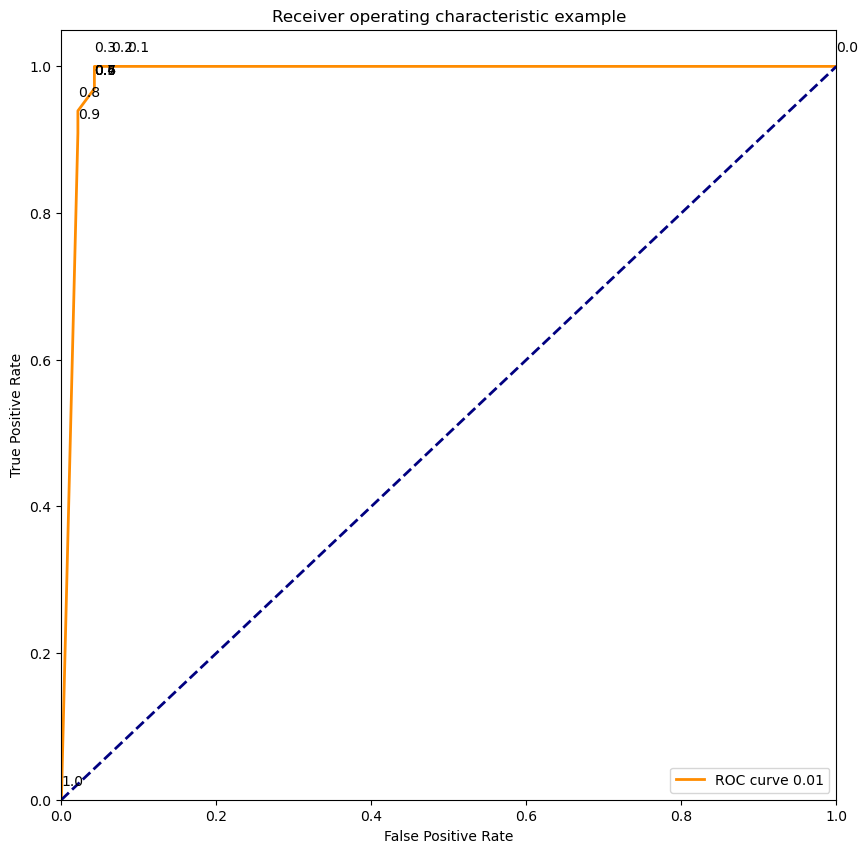

In [122]:
# compute roc auc
roc_auc = auc(tprs, fprs)

plt.figure(figsize=(10,10))
plt.plot(fprs, tprs, color='darkorange', lw=2, label=f'ROC curve {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

for i in range(len(tprs)):
    plt.annotate(thres[i], (fprs[i], tprs[i] + 0.02))


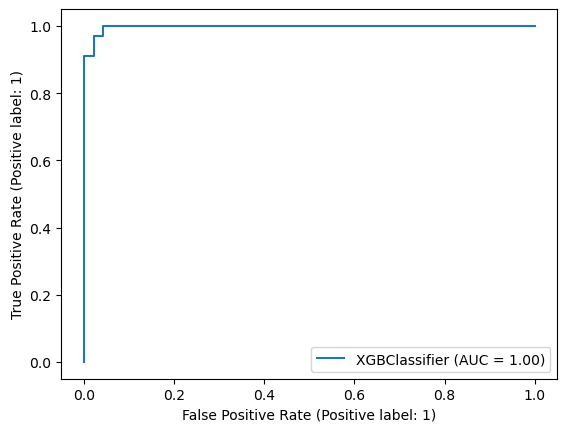

In [123]:
RocCurveDisplay.from_estimator(dtree, X_test, y_test) 
plt.show()

## 7. Summary

*For our Chronic Kidney Disease dataset from India, we observe a greater negative impact for false negative than for false positive, hence we tried to choose a model with highest recall value.*
*We have split the data as 80/20 train test slipt and applied suitable modules with default parameters and also by tuned them.*

> Recall scores before Hyper parameter tuning


| model | Recall
| ---- | ---- |
| Knn   | 0.7878
| Decision tree | 0.9393 
| Random forest  | 0.9696 
| XgBoost  | 0.9696 
| AdaBoost | 0.9696 
| Logistic regression | 0.97
| MLP | 0.85


> Recall scores after Hyper parameter tuning


| model | Recall
| ---- | ----
| Knn   | 0.8803
| Decision tree | 0.9572
| Random forest  | 0.9375
| XgBoost  | 0.9696 
| AdaBoost | 0.9916
| Logistic Regression | TBD



From the above data we can say that there is a significant increase in recall score after implementing the hyper parameter tuning. *We have got the best solution by using hyper tuning on 'AdaBoost using GridsearchCv' (Highest Recall Score ) that is 0.9916.*